In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
dataset=pd.read_csv(r"E:\tops\Data Science Intern\1 Retail Sales Forecasting\Retail_Sales_Forecasting.csv")
dataset.head(10)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer
5,2022-01-01,S001,P0006,Groceries,South,138,128,102,139.82,76.83,10,Sunny,1,79.35,Winter
6,2022-01-01,S001,P0007,Furniture,East,359,97,167,108.92,34.16,10,Rainy,1,36.55,Winter
7,2022-01-01,S001,P0008,Clothing,North,380,312,54,329.73,97.99,5,Cloudy,0,100.09,Spring
8,2022-01-01,S001,P0009,Electronics,West,183,175,135,174.15,20.74,10,Cloudy,0,17.66,Autumn
9,2022-01-01,S001,P0010,Toys,South,108,28,196,24.47,59.99,0,Rainy,1,61.21,Winter


In [3]:
dataset.shape 

(73100, 15)

In [4]:
dataset.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

In [5]:
dataset = dataset[['Date', 'Product ID', 'Category', 'Region', 
                    'Units Sold', 'Price', 'Discount', 
                    'Holiday/Promotion', 'Weather Condition', 
                    'Competitor Pricing', 'Seasonality']]


In [6]:
dataset.head(3)

,Date,Product ID,Category,Region,Units Sold,Price,Discount,Holiday/Promotion,Weather Condition,Competitor Pricing,Seasonality
0,2022-01-01,P0001,Groceries,North,127,33.50,20,0,Rainy,29.69,Autumn
1,2022-01-01,P0002,Toys,South,150,63.01,20,0,Sunny,66.16,Autumn
2,2022-01-01,P0003,Toys,West,65,27.99,10,1,Sunny,31.32,Summer


In [7]:
dataset.isnull().sum()

Date                  0
Product ID            0
Category              0
Region                0
Units Sold            0
Price                 0
Discount              0
Holiday/Promotion     0
Weather Condition     0
Competitor Pricing    0
Seasonality           0
dtype: int64

In [8]:
dataset.describe()

,Units Sold,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,136.464870,55.135108,10.009508,0.497305,55.146077
std,108.919406,26.021945,7.083746,0.499996,26.191408
min,0.000000,10.000000,0.000000,0.000000,5.030000
25%,49.000000,32.650000,5.000000,0.000000,32.680000
50%,107.000000,55.050000,10.000000,0.000000,55.010000
75%,203.000000,77.860000,15.000000,1.000000,77.820000
max,499.000000,100.000000,20.000000,1.000000,104.940000


C:\Users\thako\AppData\Local\Temp\ipykernel_8248\489162956.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Competitor Pricing'])


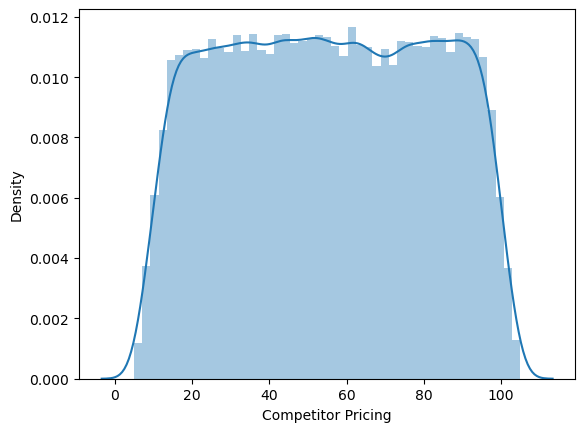

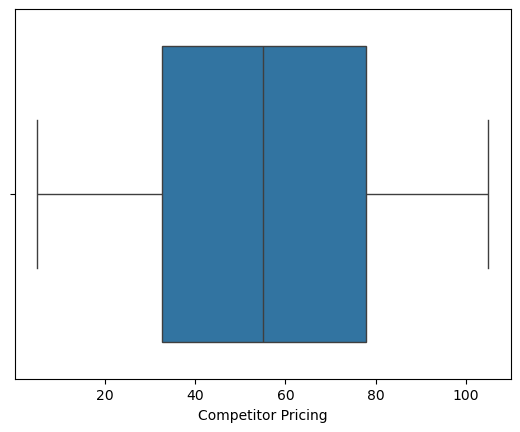

In [9]:
sns.distplot(dataset['Competitor Pricing'])
plt.show()
sns.boxplot(x="Competitor Pricing" ,data=dataset)
plt.show()

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Product ID          73100 non-null  object 
 2   Category            73100 non-null  object 
 3   Region              73100 non-null  object 
 4   Units Sold          73100 non-null  int64  
 5   Price               73100 non-null  float64
 6   Discount            73100 non-null  int64  
 7   Holiday/Promotion   73100 non-null  int64  
 8   Weather Condition   73100 non-null  object 
 9   Competitor Pricing  73100 non-null  float64
 10  Seasonality         73100 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 6.1+ MB


In [12]:
dataset['Date']=pd.to_datetime(dataset['Date'])

In [13]:
dataset['Year']=dataset['Date'].dt.year
dataset['Month']=dataset['Date'].dt.month
dataset['Day']=dataset['Date'].dt.day
dataset['Dayofweek']=dataset['Date'].dt.dayofweek
dataset['Quarter'] = dataset['Date'].dt.quarter
dataset['IsWeekend'] = dataset['Date'].dt.dayofweek.isin([5,6]).astype(int)
dataset['IsMonthStart'] = dataset['Date'].dt.is_month_start.astype(int)
dataset['IsMonthEnd'] = dataset['Date'].dt.is_month_end.astype(int)
dataset = dataset.drop(columns=['Date'])

In [14]:
le=LabelEncoder()

In [15]:
dataset['Product ID']=le.fit_transform(dataset['Product ID'])

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product ID          73100 non-null  int64  
 1   Category            73100 non-null  object 
 2   Region              73100 non-null  object 
 3   Units Sold          73100 non-null  int64  
 4   Price               73100 non-null  float64
 5   Discount            73100 non-null  int64  
 6   Holiday/Promotion   73100 non-null  int64  
 7   Weather Condition   73100 non-null  object 
 8   Competitor Pricing  73100 non-null  float64
 9   Seasonality         73100 non-null  object 
 10  Year                73100 non-null  int32  
 11  Month               73100 non-null  int32  
 12  Day                 73100 non-null  int32  
 13  Dayofweek           73100 non-null  int32  
 14  Quarter             73100 non-null  int32  
 15  IsWeekend           73100 non-null  int64  
 16  IsMo

In [25]:
dataset.select_dtypes(include=['object'])

,Category,Region,Weather Condition,Seasonality
0,Groceries,North,Rainy,Autumn
1,Toys,South,Sunny,Autumn
2,Toys,West,Sunny,Summer
3,Toys,North,Cloudy,Autumn
4,Electronics,East,Sunny,Summer
...,...,...,...,...
73095,Furniture,East,Snowy,Winter
73096,Toys,North,Cloudy,Autumn
73097,Clothing,West,Rainy,Winter
73098,Toys,East,Rainy,Spring


In [38]:
category=dataset['Category'].unique()
Region=dataset['Region'].unique()
Weather_Condition=dataset['Weather Condition'].unique()
Seasonality=dataset['Seasonality'].unique()
print('category=',category)
print('Region =',Region)
print('Weather_Condition =',Weather_Condition)
print('Seasonality =',Seasonality)

category= ['Groceries' 'Toys' 'Electronics' 'Furniture' 'Clothing']
Region = ['North' 'South' 'West' 'East']
Weather_Condition = ['Rainy' 'Sunny' 'Cloudy' 'Snowy']
Seasonality = ['Autumn' 'Summer' 'Winter' 'Spring']


In [27]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
ohe=OneHotEncoder(sparse_output=False) 

In [48]:
dataset[category]=(ohe.fit_transform(dataset[['Category']]))
dataset[Region]=ohe.fit_transform(dataset[['Region']])
dataset[Weather_Condition]=ohe.fit_transform(dataset[['Weather Condition']])
dataset[Seasonality]=ohe.fit_transform(dataset[['Seasonality']])

In [53]:

dataset=dataset.drop(columns=dataset.select_dtypes(include=['object']).columns.tolist())




In [54]:
dataset

,Product ID,Units Sold,Price,Discount,Holiday/Promotion,Competitor Pricing,Year,Month,Day,Dayofweek,...,West,East,Rainy,Sunny,Cloudy,Snowy,Autumn,Summer,Winter,Spring
0,0,127,33.50,20,0,29.69,2022,1,1,5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,150,63.01,20,0,66.16,2022,1,1,5,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2,65,27.99,10,1,31.32,2022,1,1,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,61,32.72,10,1,34.74,2022,1,1,5,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,14,73.64,0,0,68.95,2022,1,1,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,15,8,73.73,20,0,72.45,2024,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
73096,16,51,82.57,10,0,83.78,2024,1,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
73097,17,36,11.11,10,0,10.91,2024,1,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
73098,18,264,53.14,20,0,55.80,2024,1,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product ID          73100 non-null  int64  
 1   Units Sold          73100 non-null  int64  
 2   Price               73100 non-null  float64
 3   Discount            73100 non-null  int64  
 4   Holiday/Promotion   73100 non-null  int64  
 5   Competitor Pricing  73100 non-null  float64
 6   Year                73100 non-null  int32  
 7   Month               73100 non-null  int32  
 8   Day                 73100 non-null  int32  
 9   Dayofweek           73100 non-null  int32  
 10  Quarter             73100 non-null  int32  
 11  IsWeekend           73100 non-null  int64  
 12  IsMonthStart        73100 non-null  int64  
 13  IsMonthEnd          73100 non-null  int64  
 14  Groceries           73100 non-null  float64
 15  Toys                73100 non-null  float64
 16  Elec

In [57]:
from sklearn.model_selection import train_test_split

In [59]:
x=dataset.drop(columns=['Units Sold'])
y=dataset['Units Sold']

In [62]:
dataset.shape

(73100, 31)

In [61]:
x.shape

(73100, 30)

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
from xgboost import XGBRegressor

In [65]:
xgb_model = XGBRegressor(
    n_estimators=500,        # number of trees
    learning_rate=0.05,      # step size shrinkage
    max_depth=6,             # maximum depth of a tree
    subsample=0.8,           # fraction of data to train each tree
    colsample_bytree=0.8,    # fraction of features for each tree
    random_state=42
)

In [67]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [70]:
y_pred = xgb_model.predict(x_test)


array([136.5289  , 119.40983 , 118.432526, ..., 146.85004 , 140.48785 ,
       119.56075 ], dtype=float32)

In [74]:
xgb_model.score(x_test,y_test)*100

-2.080368995666504